In [33]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Soal
1. Berdasarkan ilustrasi  Data diatas buatkanlah dataset 
2. Buatlah decision tree menurut   untuk menentukan klasifikasi berdasarkan departementnya
3. Buatlah rules-based classification berdasarkan decision tree tersebut


## 1. Loading Dataset
Dataset dibuat berdasarkan rule yang telah diberikan pada lampiran soal UTS, Dataset disimpan dalam bentuk .csv

In [34]:
## 1. Load Dataset
import pandas as pd

df = pd.read_csv('./UTS_DataSchience_I_Dataset.csv',delimiter=';')
df.head(10)

,usia,gaji,status,departement
0,31,46000,senior,sales
1,32,47000,senior,sales
2,34,56000,senior,sales
3,32,48000,senior,sales
4,33,59000,senior,sales
5,32,53000,senior,sales
6,31,57000,senior,sales
7,31,56000,senior,sales
8,31,59000,senior,sales
9,31,48000,senior,sales


In [35]:
df.status.unique()

array(['senior', 'junior'], dtype=object)

In [36]:
# Split Dataset to test and train
# Data will be 70% for train and 30% for test
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(df.status.unique())


df.status = le.transform(df.status)

X = df[['usia','gaji','status']]
y = df[['departement']]

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=1)

## 2. Buatlah decision tree menurut   untuk menentukan klasifikasi berdasarkan departementnya

In [37]:
from sklearn.tree import DecisionTreeClassifier

decisionTree = DecisionTreeClassifier(criterion='gini')
tree_model = decisionTree.fit(X=X_train,y=y_train)
tree_model.score(X_test,y_test)

0.92

Precision :  92.0 %
Recall :  92.0 %
Accuracy :  92.0 %


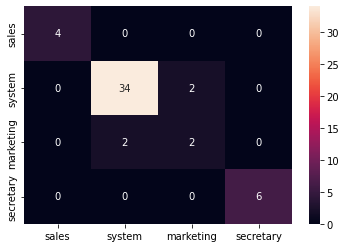

In [38]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,accuracy_score

y_predict = tree_model.predict(X_test)

confusion = confusion_matrix(y_test,y_predict)
precision = precision_score(y_test,y_predict,average="weighted")
recall = recall_score(y_test,y_predict,average="weighted")
accuracy = accuracy_score(y_test,y_predict)


ax = plt.subplot()

sns.heatmap(confusion,ax=ax,annot=True)
ax.xaxis.set_ticklabels(df.departement.unique()); ax.yaxis.set_ticklabels(df.departement.unique())
print("Precision : ",round(precision*100,2),"%" )
print("Recall : ",recall*100,"%")
print("Accuracy : ",accuracy*100,"%" )



## 3. Rule Based Classification

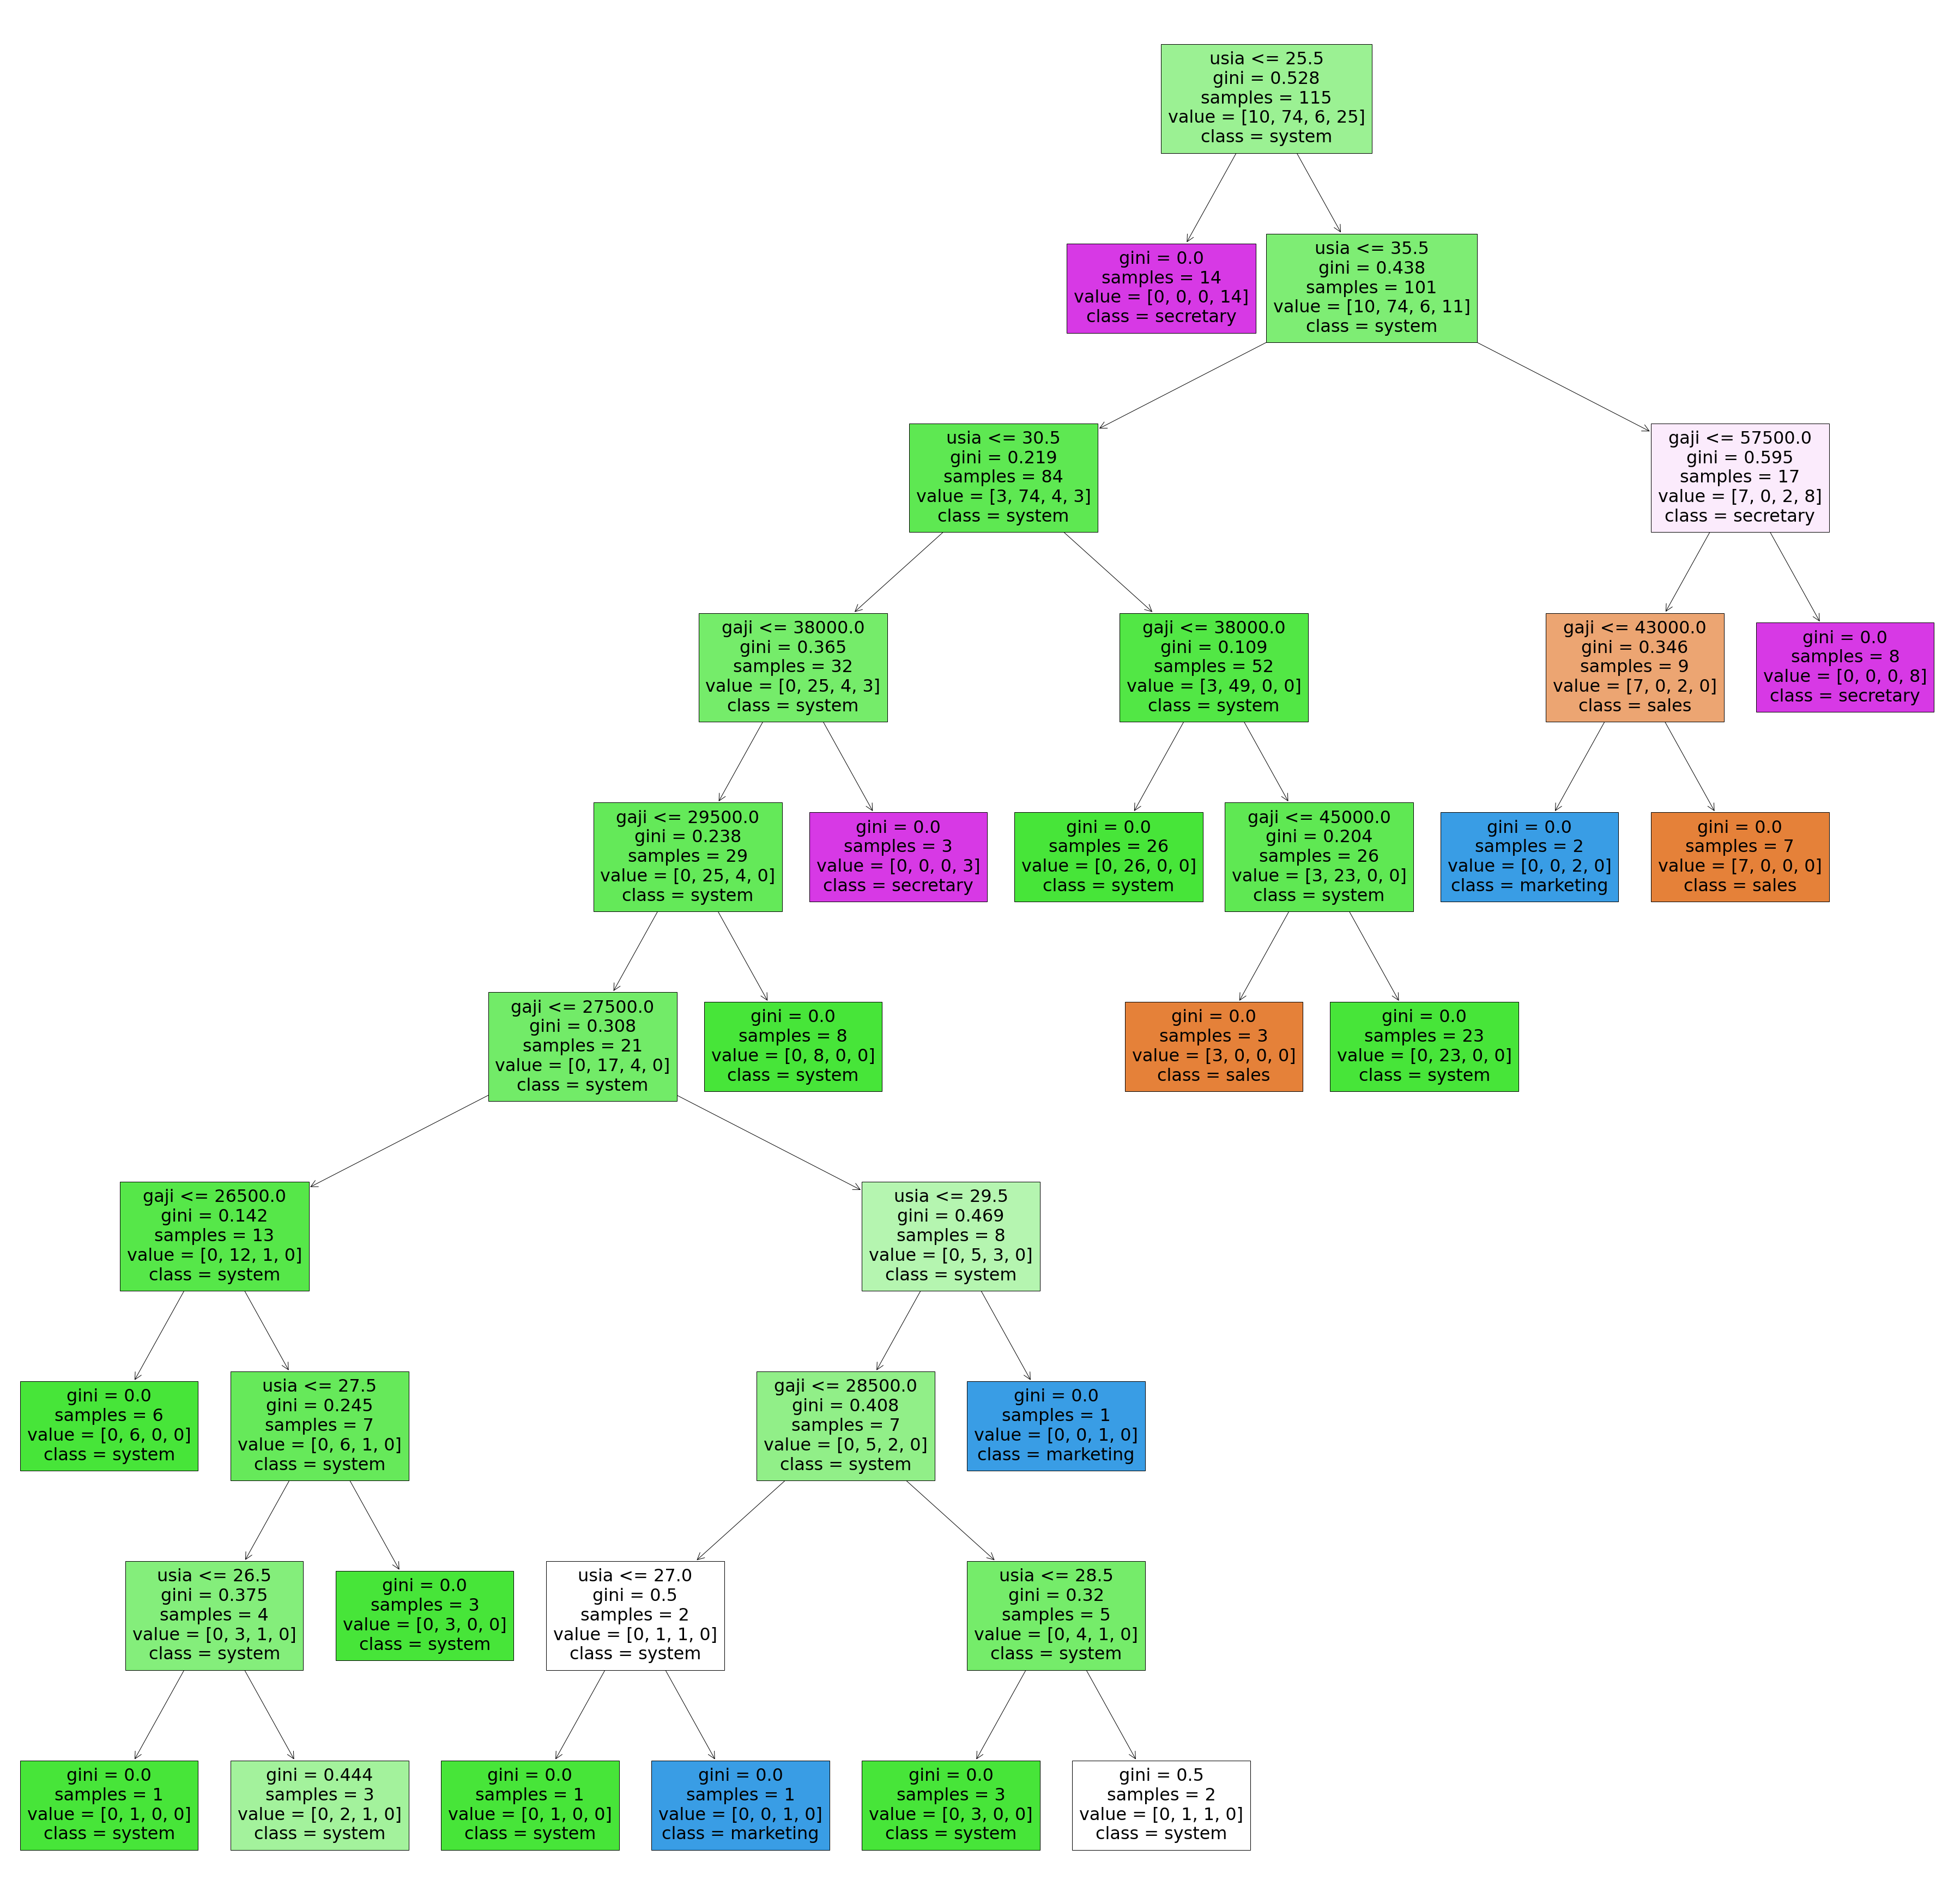

In [39]:
from sklearn.tree import export_text,plot_tree
plt.figure(figsize=(64,64))
plot_tree(tree_model,feature_names=X_test.columns,class_names=df.departement.unique(),filled=True,)
plt.show()


## Pengujian

In [40]:
status = le.transform(['junior'])
status[0]
tree_model.predict([[37,49000,status[0]]])

/Users/harysetiawan/Documents/Collage/Tugas/Data Schience/UTS/venv/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['marketing'], dtype=object)